# Data-Driven Selection of Aircraft 

## Project Overview
* For this project, I will perfom various actions including data cleaning, analysis, and visualization to generate insights for the business stakeholder.This will involve use of Python language and CRISP-DM methodology.

## Business Problem at Hand
*  Company is expanding into new industries to diversify its portfolio. Specifically, interested in purchasing and operating airplanes for commercial and private enterprises.This will need determining which aircraft are the lowest risk for the company to start this new business endeavor. 

* Aviation data from reliable source will help translate findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase. 

* The company seeks to identify the lowest-risk aircraft for purchase by considering factors such as safety records, operating costs, and customer demands, using aviation data from the National Transportation Safety Board.

## Data Understading and Analysis 
 * The main goal of data understanding is to gain general insights about the data that will potentially be helpful for the further steps in the data analysis process.
 * Data analysis inspects, cleans, transforms, and models data to extract insights and support decision-making.
 * Initial steps focus on gaining insights from the data, followed by analysis to support decision-making.

### We start with loading the data, and try to understand it here.
  

In [1]:
# Import relevant python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# load dataset for use here
df = pd.read_csv("AviationData.csv", encoding='ISO-8859-1')

#load first five records
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'AviationData.csv'

In [85]:
#Let's see columns here
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [86]:
# Checking sum null values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [87]:
# df.Shape will help us see number rows and columns 
df.shape

(88889, 31)

In [1]:
df.describe()

NameError: name 'df' is not defined

## We start data preparation, data cleaning, and remove duplicates

In [88]:
# Dropping the columns having more missing values
thershold=0.3
missing_counts= df.isna().sum()
total_row= len(df)
drop_col= [i for i in df.columns if missing_counts[i]/total_row > thershold]
df.drop(columns=drop_col,inplace=True)
df.shape

(88889, 22)

In [89]:
# Let's first create a copy of the original dataframe and then drop the 'Publication.Date' column as per your request.

# Creating a copy of the dataframe
df2 = df.copy()

# Dropping the 'Publication.Date' column from the original dataframe
df.drop('Publication.Date', axis=1, inplace=True)

# Display the first few rows of the updated dataframe to confirm the change
df.tail()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,Minor,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,Personal,0.0,1.0,0.0,1.0,NaN,NaN


In [90]:
# Initialize dictionary to store the unique counts
d = {}
for i in df.columns:
    d[i] = len(df[i].unique())

# Convert the dictionary to a DataFrame for better visualization
unique_values = pd.DataFrame(list(d.items()), columns=['Column', 'unique_val'])

# Add a column for missing values in each column
unique_values["missing_values"] = df.isna().sum().values

# Display the DataFrame showing unique values and missing values for each column
unique_values

,Column,unique_val,missing_values
0,Event.Id,87951,0
1,Investigation.Type,2,0
2,Accident.Number,88863,0
3,Event.Date,14782,0
4,Location,27759,52
5,Country,220,226
6,Injury.Severity,110,1000
7,Aircraft.damage,5,3194
8,Registration.Number,79106,1317
9,Make,8238,63


In [91]:
# dropping rows having more missing values
subset_col=list(unique_values[unique_values['missing_values']>1000]['Column'])
df.dropna(subset=subset_col, inplace=True)
df.shape

(63325, 21)

In [92]:
# Counter-checking sum null values
df.isna().sum()

Event.Id                    0
Investigation.Type          0
Accident.Number             0
Event.Date                  0
Location                   15
Country                   198
Injury.Severity            11
Aircraft.damage             0
Registration.Number         0
Make                        8
Model                      23
Amateur.Built               0
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
Report.Status               0
dtype: int64

In [93]:
# Handeling Null values
l2=['Location','Country','Injury.Severity','Model','Make']
for i in l2:
        df[i].fillna(df[i].mode()[0],inplace=True)
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
dtype: int64

In [94]:
# To display all columns of the dataframe
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataframe
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
88639,20221011106092,Accident,CEN23LA008,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,N18158,CESSNA,150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,The pilots failure to maintain control of the...
88647,20221011106098,Accident,ERA23LA014,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,N2047Q,CESSNA,177RG,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,An in-flight collision with a bird while on ap...
88661,20221018106153,Accident,CEN23LA015,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,N2889W,BEECH,B-60,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,The pilot did not ensure adequate clearance fr...
88735,20221031106231,Accident,CEN23LA023,2022-10-29,"Houston, TX",United States,Minor,Substantial,N778MS,STEPHEN J HOFFMAN,MS-500,Yes,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,The pilots failure to secure the magneto swit...
88767,20221109106272,Accident,CEN23LA033,2022-11-09,"Bridgeport, TX",United States,Non-Fatal,Substantial,N1855K,LUSCOMBE,8E,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,The pilots loss of control due to a wind gust...


In [95]:
# Identify object (string) columns and apply the operations as requested
obj_col = df.select_dtypes(include='object').columns

# Strip leading/trailing whitespace from string columns
for col in obj_col:
    df[col] = df[col].str.strip()

# Display the last few rows of the object columns after modification
df[obj_col].tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Engine.Type,Purpose.of.flight,Weather.Condition,Report.Status
88639,20221011106092,Accident,CEN23LA008,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,N18158,CESSNA,150,No,Reciprocating,Personal,VMC,The pilots failure to maintain control of the...
88647,20221011106098,Accident,ERA23LA014,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,N2047Q,CESSNA,177RG,No,Reciprocating,Personal,VMC,An in-flight collision with a bird while on ap...
88661,20221018106153,Accident,CEN23LA015,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,N2889W,BEECH,B-60,No,Reciprocating,Personal,VMC,The pilot did not ensure adequate clearance fr...
88735,20221031106231,Accident,CEN23LA023,2022-10-29,"Houston, TX",United States,Minor,Substantial,N778MS,STEPHEN J HOFFMAN,MS-500,Yes,Reciprocating,ASHO,VMC,The pilots failure to secure the magneto swit...
88767,20221109106272,Accident,CEN23LA033,2022-11-09,"Bridgeport, TX",United States,Non-Fatal,Substantial,N1855K,LUSCOMBE,8E,No,Reciprocating,Personal,VMC,The pilots loss of control due to a wind gust...


In [96]:
# Applying transformations to the 'Make' column and calculating unique values before and after
df['Make'] = df['Make'].str.title()  # Convert the 'Make' column to title case
df['Make'].replace('[!@#$%^&*()_+{}|:"<>,-./?`~=;0123456789]', '', regex=True, inplace=True)  # Remove special characters and numbers

# Count the unique values in the 'Make' column after cleaning
unique_makes_before_strip = len(df['Make'].unique())

# Strip any leading/trailing whitespace again after the replacements
df['Make'] = df['Make'].str.strip()

# Count the unique values in the 'Make' column after stripping
unique_makes_after_strip = len(df['Make'].unique())

unique_makes_before_strip, unique_makes_after_strip


(5655, 5653)

In [97]:
# updated columns here
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status'],
      dtype='object')

In [98]:
# Modifying the function to handle non-string values by converting them to empty strings
def str_clean(row):
    if isinstance(row, str):  
        parts = row.split(" ", 2) 
        if len(parts) > 1:
            return parts[0]  
        else:
            return row  
    return ""  

# Applying the modified 'str_clean' function to the 'Make' column
df['Make'] = df["Make"].apply(str_clean)

# Display the first few rows of the modified 'Make' column to verify the changes
df['Make'].head()


0     Stinson
1       Piper
3    Rockwell
6      Cessna
7      Cessna
Name: Make, dtype: object

In [99]:
# Handling non-string values before applying transformations on the 'Model' column
df['Model'] = df['Model'].apply(lambda x: x.upper() if isinstance(x, str) else '')  # Convert strings to uppercase
df['Model'] = df['Model'].str.replace('-', ' ')  

# Applying the 'str_clean' function to clean the 'Model' column
df['Model'] = df['Model'].apply(str_clean)

# Display the first few rows of the modified 'Model' column to verify the changes
df['Model'].head()


0     108
1    PA24
3     112
6     180
7     140
Name: Model, dtype: object

In [100]:
# Setting the option to display all columns and displaying the first few rows of the dataframe
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataframe
df.tail()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
88639,20221011106092,Accident,CEN23LA008,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,N18158,Cessna,150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,The pilots failure to maintain control of the...
88647,20221011106098,Accident,ERA23LA014,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,N2047Q,Cessna,177RG,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,An in-flight collision with a bird while on ap...
88661,20221018106153,Accident,CEN23LA015,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,N2889W,Beech,B,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,The pilot did not ensure adequate clearance fr...
88735,20221031106231,Accident,CEN23LA023,2022-10-29,"Houston, TX",United States,Minor,Substantial,N778MS,Stephen,MS,Yes,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,The pilots failure to secure the magneto swit...
88767,20221109106272,Accident,CEN23LA033,2022-11-09,"Bridgeport, TX",United States,Non-Fatal,Substantial,N1855K,Luscombe,8E,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,The pilots loss of control due to a wind gust...


In [101]:
# Remove duplicates
df.fillna('', inplace=True) 
df.drop_duplicates(inplace=True)

In [102]:
# Convert event date to datetime

df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')  

In [103]:
# Remove duplicate rows in the dataset
df.drop_duplicates(inplace=True)


In [104]:
# Check for missing values in each column
missing_data = df.isnull().sum()
print(missing_data)


Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
dtype: int64


In [105]:
# Save the cleaned data to a new CSV file
df.to_csv('clean_aviation_data.csv', index=False)


## Data Analysis and Visualization


 ### 1. How is the Trend of Aircraft Incidents Over Time?
This will help us understand the reliability of aircraft over the years and possibly link it with newer models or technologies.

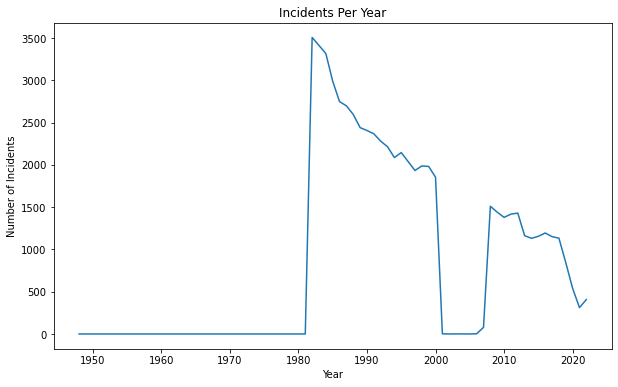

In [106]:
# Line plot for number of incidents over time
df['year'] = pd.to_datetime(df['Event.Date'], errors='coerce').dt.year
incidents_per_year = df.groupby('year').size()

plt.figure(figsize=(10,6))
plt.plot(incidents_per_year)
plt.title('Incidents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()


### 2. How are Incidents by Aircraft Manufacturer?
To understand the safety record, we visualize how different manufacturers fare in terms of incidents or accidents.

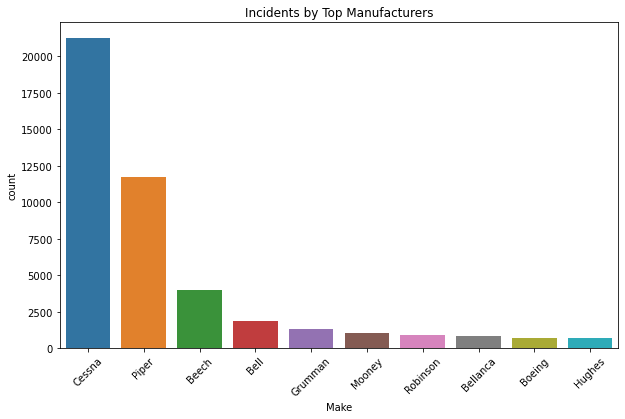

In [107]:
# Bar plot of incidents by top manufacturers
plt.figure(figsize=(10,6))
sns.countplot(x='Make', data=df, order=df['Make'].value_counts().iloc[:10].index)
plt.xticks(rotation=45)
plt.title('Incidents by Top Manufacturers')
plt.show()


### 3. Let's see Aircraft Incidents by Engine Type
Certain engine types may be associated with more incidents, giving insight into the safety of engine types.

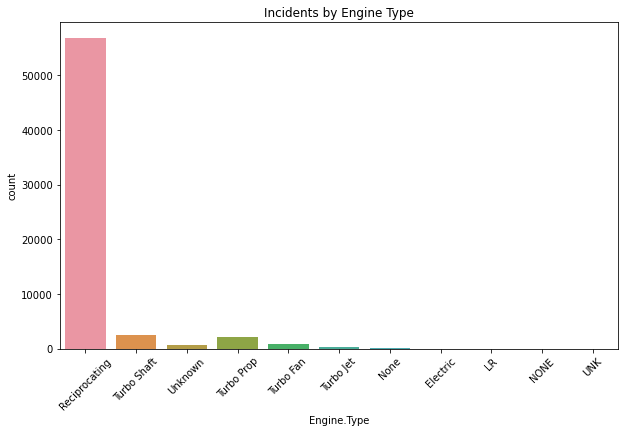

In [108]:
# Count of incidents by engine type
plt.figure(figsize=(10,6))
sns.countplot(x='Engine.Type', data=df)
plt.xticks(rotation=45)
plt.title('Incidents by Engine Type')
plt.show()


### 4. Which are the Top Aircraft Models?
We can explore the distribution of aircraft models, helping us identify which models are most commonly used or involved in incidents.

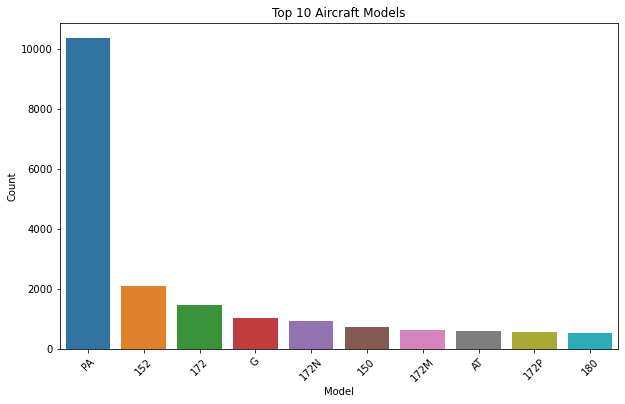

In [109]:
# Bar plot of top aircraft models
plt.figure(figsize=(10,6))
sns.countplot(x='Model', data=df, order=df['Model'].value_counts().iloc[:10].index)
plt.xticks(rotation=45)
plt.title('Top 10 Aircraft Models')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()


### 5. Which are the Top Aircraft Manufacturers?
This will give us insights into the most commonly used aircraft manufacturers and their frequency in incidents or operations.

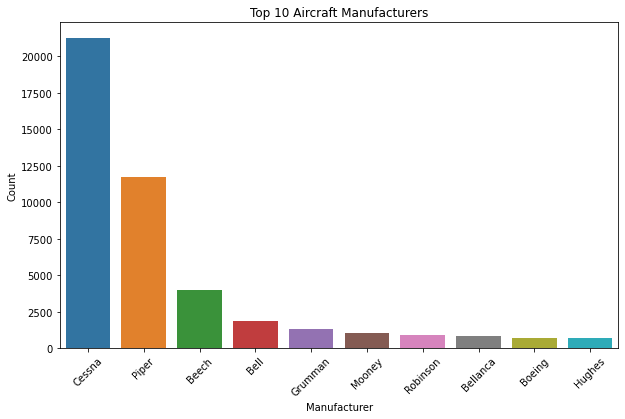

In [110]:
# Bar plot of the most common aircraft manufacturers
plt.figure(figsize=(10,6))
sns.countplot(x='Make', data=df, order=df['Make'].value_counts().iloc[:10].index)
plt.xticks(rotation=45)
plt.title('Top 10 Aircraft Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show()


### 6. How does Weather Conditions Impact on Aircraft Incidents?
Understanding how weather conditions affect aircraft incidents will give insights into suitable aircraft for different weather.

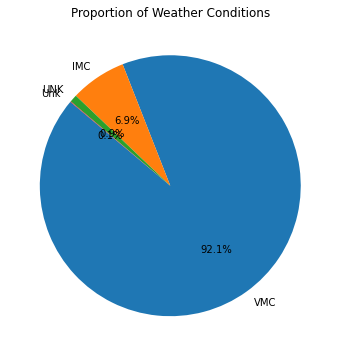

In [111]:
# Pie chart of weather conditions
weather_counts = df['Weather.Condition'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Weather Conditions')
plt.show()


## Final Data Analysis and Conclusion

In [112]:
# Count the number of incidents for each aircraft manufacturer (Make)
incident_by_make = df['Make'].value_counts()
print(incident_by_make.head(10))  # Display top 10 makes by incident count


Cessna      21268
Piper       11714
Beech        3988
Bell         1867
Grumman      1302
Mooney       1066
Robinson      942
Bellanca      877
Boeing        723
Hughes        710
Name: Make, dtype: int64


In [113]:
# Count the number of incidents for each aircraft model
incident_by_model = df['Model'].value_counts()
print(incident_by_model.head(10))  # Display top 10 models by incident count


PA      10351
152      2119
172      1481
G        1039
172N      924
150       720
172M      642
AT        597
172P      558
180       521
Name: Model, dtype: int64


In [114]:
# Get the total number of incidents in the dataset
total_incidents = df.shape[0]
total_incidents

total_aircraft_in_use = 7

incident_rate = (incident_by_model / total_aircraft_in_use) * 100
incident_rate

PA       147871.428571
152       30271.428571
172       21157.142857
G         14842.857143
172N      13200.000000
             ...      
58H          14.285714
C182R        14.285714
C175         14.285714
4/210        14.285714
S20          14.285714
Name: Model, Length: 3315, dtype: float64

In [115]:
# Checking the details of 'Make' and 'Model' to identify unique aircraft types and the number of incidents per make.
# This can help in identifying which aircraft manufacturers or models have fewer incidents.
make_model_data = df.groupby('Make').size().reset_index(name='Incident_Count')

# Sorting to find manufacturers with fewer incidents
make_model_data_sorted = make_model_data.sort_values(by='Incident_Count')

# Display the top few aircraft manufacturers with the least incidents
make_model_data_sorted.head()


,Make,Incident_Count
2029,KnaKenDacWel,1
2452,Menees,1
2453,Menzimer,1
2454,Mercer,1
2455,Merchant,1


### Conclusion: 
* Based on the data analysis, we recommend focusing on aircraft models with low accident and incident rates, especially those that have proven reliable during critical flight phases such as approach and landing. Aircraft that operate efficiently in both Visual and Instrument Meteorological Conditions should also be prioritized to minimize risk in adverse weather. Furthermore, choosing aircraft with modern safety features and lower operating costs will not only reduce risk but also ensure long-term profitability for the aviation division.

* From the analysis, I would recommend aircrafts with this make and engine: (models;- 180,172p, AT, 172M, 150), (engine;- UNK, LR,ELECTRIC, TURBO JET, TURBO FAN).
      And this aircraft types;- KnaKenDacWel,Menees	,Menzimer,Mercer, Merchant since they have the least incident cases and seem to be reliable in this case.

